In [ ]:
import os
for dirname, _, filenames in os.walk('/content/Dataset/'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # from google.colab import files 

In [ ]:
 ####! pip install -q kaggle

In [ ]:
#files.upload()

In [ ]:
# ! mkdir ~/.kaggle

#! cp kaggle.json ~/.kaggle/

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 #! kaggle datasets list

In [ ]:
#!kaggle datasets download -d shubhamgoel27/dermnet

In [ ]:
#! mkdir train
#! mkdir test

In [ ]:

#! unzip dermnet.zip -d test

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [ ]:
test_list=os.listdir('/content/Dataset/test') 
#len test_list 
train_list=os.listdir('/content/Dataset/train')
#len(train_list) 23

#SORTING THEM FOR REFERENCE
train_list.sort()
test_list.sort()
#viewing items
#test_list[0:5]

print(train_list)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [ ]:
train_list_mod=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Eczema Photos', 'Nail Fungus and other Nail Disease', 'Psoriasis pictures Lichen Planus and related diseases']

In [ ]:
len(train_list_mod)

6

In [ ]:
def data_dictionary():
    path_train="/content/Dataset/train/"
    path_test="/content/Dataset/test/"
    list_train=train_list_mod#os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        path_disease_test=path_test+i
        image_list_train=os.listdir(path_disease_train)
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k) 
        for m in image_list_test :
            img_path_test=path_disease_test+"/"+m
            test_dictionary["image_path"].append(img_path_test)
            test_dictionary['target'].append(k)
        k+=1 
    test_df=pd.DataFrame(test_dictionary)
    train_df=pd.DataFrame(train_dictionary)
        
    return  train_df,test_df

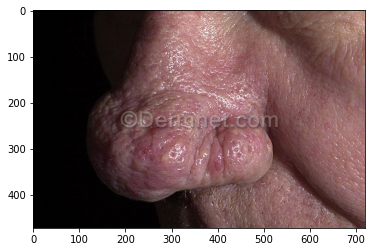

In [ ]:
img=Image.open("/content/Dataset/test/Acne and Rosacea Photos/07Rhinophyma1.jpg")
plt.imshow(img)

In [ ]:
def load_data(input_size=(100,100)):
    images=[]
    images2=[]
    train_df,test_df=data_dictionary()
    for i in train_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images.append(img)
    y_train=np.asarray(train_df['target'])
    x_train=np.asarray(images)
    for i in test_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images2.append(img)
    y_test=np.asarray(test_df['target'])
    x_test=np.asarray(images2)
    return x_train,x_test,y_train,y_test



In [ ]:
x_train,x_test,y_train,y_test=load_data(input_size=(100,100))

In [ ]:
from tensorflow.keras.applications import  VGG19
from tensorflow.keras.models import Model
from keras.applications.vgg19 import preprocess_input


In [ ]:
vgg16 = VGG19(include_top=False,weights='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
import joblib

In [ ]:
filename="vgg16.sav"
joblib.dump(vgg16,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_10
.........vars
............0
............1
......conv2d_11
.........vars
............0
............1
......conv2d_12
.........vars
............0
............1
......conv2d_13
.........vars
............0
............1
......conv2d_14
.........vars
............0
............1
......conv2d_15
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......conv2d_5
.........vars
............0
............1
......conv2d_6
.........vars
............0
............1
......conv2d_7
.........vars
............0
............1
......conv2d_8
.........vars
............0
............1
......conv2d_9
.........vars
............0
............1
......in

In [ ]:
vgg19=joblib.load("vgg16.sav")

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-28 19:54:54           64
config.json                                    2023-03-28 19:54:54        11992
variables.h5                                   2023-03-28 19:54:54     80154664
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_10
.........vars
............0
............1
......conv2d_11
.........vars
............0
............1
......conv2d_12
.........vars
............0
............1
......conv2d_13
.........vars
............0
............1
......conv2d_14
.........vars
............0
............1
......conv2d_15
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
.

In [ ]:
train_img=preprocess_input(x_train)
test_img=preprocess_input(x_test)

In [ ]:
features_train=vgg16.predict(train_img)

193/193 [==============================] - 667s 3s/step


In [ ]:
features_test=vgg16.predict(test_img)

52/52 [==============================] - 178s 3s/step


In [ ]:
features_train.shape

(6158, 3, 3, 512)

In [ ]:
features_test.shape

(1645, 3, 3, 512)

In [ ]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]


In [ ]:
x_train=features_train.reshape(num_train,4608)
x_test=features_test.reshape(num_test,4608)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [ ]:
model=Sequential([ Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(6,activation='sigmoid'),

])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=40,validation_data=(x_test,y_test))

Epoch 1/40
193/193 [==============================] - 16s 79ms/step - loss: 1.7450 - accuracy: 0.5119 - val_loss: 1.0786 - val_accuracy: 0.6049
Epoch 2/40
193/193 [==============================] - 11s 55ms/step - loss: 0.8493 - accuracy: 0.6965 - val_loss: 1.0090 - val_accuracy: 0.6401
Epoch 3/40
193/193 [==============================] - 10s 54ms/step - loss: 0.5684 - accuracy: 0.8048 - val_loss: 1.1111 - val_accuracy: 0.6353
Epoch 4/40
193/193 [==============================] - 10s 51ms/step - loss: 0.4003 - accuracy: 0.8607 - val_loss: 1.2632 - val_accuracy: 0.6602
Epoch 5/40
193/193 [==============================] - 9s 46ms/step - loss: 0.2926 - accuracy: 0.8977 - val_loss: 1.2077 - val_accuracy: 0.6754
Epoch 6/40
193/193 [==============================] - 10s 50ms/step - loss: 0.2476 - accuracy: 0.9177 - val_loss: 1.4487 - val_accuracy: 0.6620
Epoch 7/40
193/193 [==============================] - 11s 58ms/step - loss: 0.1853 - accuracy: 0.9398 - val_loss: 1.3419 - val_accuracy: 

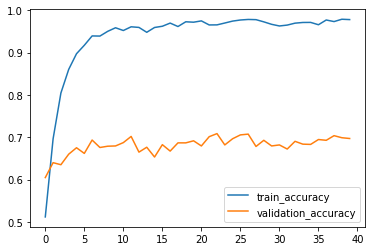

In [ ]:
plt.plot(model.history.history['accuracy'],label="train_accuracy")
plt.plot(model.history.history['val_accuracy'],label="validation_accuracy")
plt.legend()
plt.show()


In [ ]:
    
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(100,100))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg16.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(num_test,4608)
    
    return f_img
    

In [ ]:
img=load_img("/content/Dataset/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-cheilitis-sq-cell-lip-20.jpg")

1/1 [==============================] - 0s 124ms/step


In [ ]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 75ms/step


1

In [ ]:
import pickle

In [ ]:
!mkdir -p saved_model
model.save('/content/saved_model/skin_model.h5')

In [ ]:
filename="skin_model.pkl"
joblib.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-28 20:27:48           64
config.json                                    2023-

In [ ]:
new_model = tf.keras.models.load_model('saved_model/skin_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
Total params: 5,409,414
Trainable params: 5,409,414
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.argmax(new_model.predict(img))

1/1 [==============================] - 0s 21ms/step


1

In [ ]:
print(img)

[[18.91039    0.         0.        ...  0.         7.0617676  0.       ]]


In [ ]:
load_img("/content/Dataset/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-cheilitis-sq-cell-lip-20.jpg")

1/1 [==============================] - 0s 209ms/step


array([[18.91039  ,  0.       ,  0.       , ...,  0.       ,  7.0617676,
         0.       ]], dtype=float32)

Incase if you want to see predicted Image

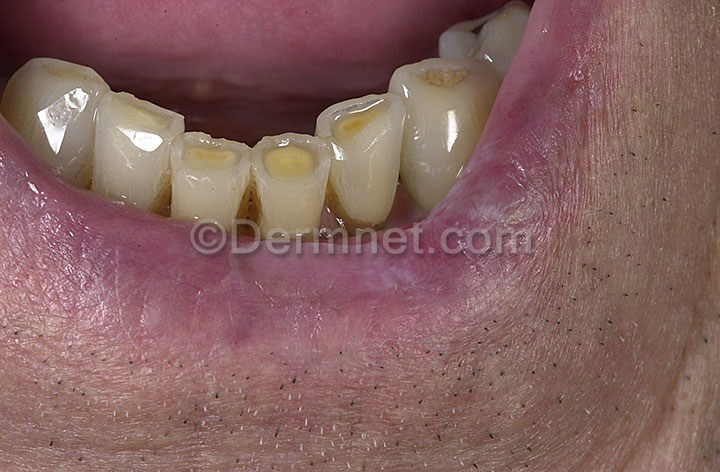

In [ ]:
#Image.open("/content/Dataset/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-cheilitis-sq-cell-lip-20.jpg")